In [1]:
import matplotlib.pyplot as plt

##### 学习率衰减测试

###### 学习率用衰减函数衰减
$lr=\frac{1}{1+decay rate \times (epoch \times (\frac{numTrainSample}{batchSize}))} \times \alpha_0$  
下面的例子测试时，$\alpha_0=0.01, \frac{numTrainSample}{batchSize}=80, decay rate=\frac{\alpha_0}{10或100}$

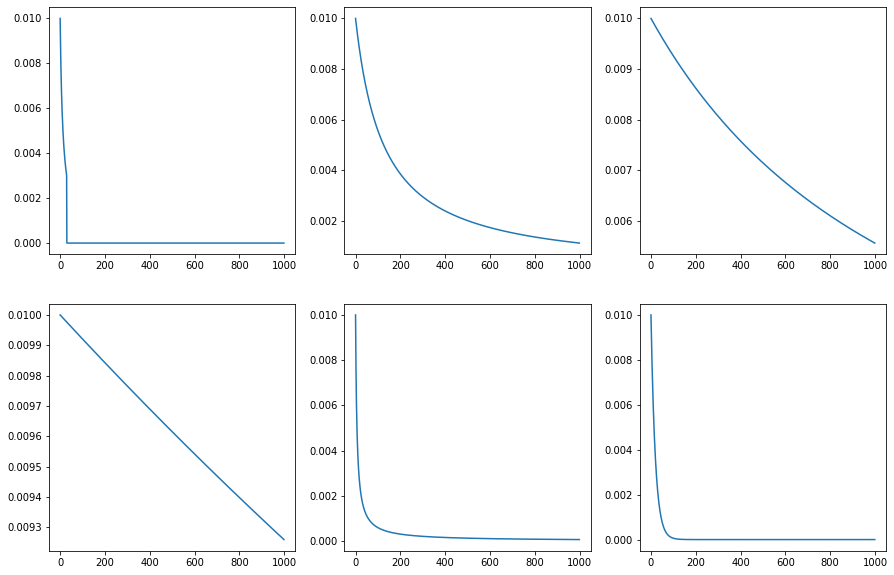

In [2]:
# tf.assign(lr, lr*(1.0/(1.0+0.01/10*(80*i))))
# y = []
# for i in range(200):
#     y.append(0.01*(1.0/(1.0+0.01/100*(80*i))))
# import matplotlib.pyplot as plt
# plt.plot(y)
# plt.show()

########################################【分析不同衰减率的衰减程度】####################################
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
y1 = []
for i in range(1000):
    if i//30!=0:
        y1.append((0.01/3*i//30)*(1.0/(1.0+(0.01/3*i//30)/10*(80*i))))
    else:
        y1.append(0.01*(1.0/(1.0+0.01/10*(80*i))))
plt.plot(y1)

plt.subplot(2,3,2)
y2 = []
for i in range(1000):
    y2.append(0.01*(1.0/(1.0+0.01/100*(80*i))))
plt.plot(y2)

plt.subplot(2,3,3)
y3 = []
for i in range(1000):
    y3.append(0.01*(1.0/(1.0+0.01/1000*(80*i))))
plt.plot(y3)

plt.subplot(2,3,4)
y4 = []
for i in range(1000):
    y4.append(0.01*(1.0/(1.0+0.01/10000*(80*i))))
plt.plot(y4)

plt.subplot(2,3,5)
y5 = []
for i in range(1000):
    y5.append(0.01*(1.0/(1.0+0.01/5*(80*i))))
plt.plot(y5)

plt.subplot(2,3,6)
y6 = []
for i in range(1000):
    y6.append(0.01*0.95**i)
plt.plot(y6)

plt.show()

对比1,2,3,4可以发现0.01/10时学习率衰减较好，但在50左右时，学习率的衰减速度减慢

learning rate | 衰减率 | epochs | note
---- | ---- | ---- | ----
0.01 | 0.01/10 | 200 | 效果较好，但在50左右时，学习率的衰减速度骤然减慢
0.01 | 0.01/100 | 200 | 
0.01 | 0.01/1000 | 200 |
0.01 | 0.01/10000 | 200 | 可以看出衰减率越小，学习率衰减的越慢
—— |—— |—— |—— |
0.01 | 0.01/10 | 1000 | 
0.01 | 0.01/100 | 1000 | 效果较好，但是迭代1000次后，学习率下降的值与0.01/10迭代200次的值一样
0.01 | 0.01/1000 | 1000 | 
0.01 | 0.01/10000 | 1000 | 

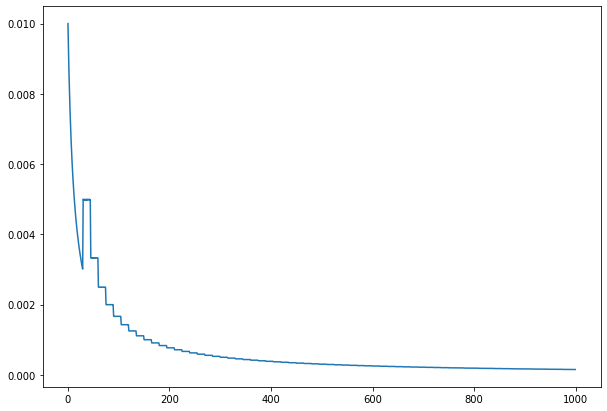

In [3]:
plt.figure(figsize=(10,7))
y1 = []
for i in range(1000):
    if i//30!=0:
        y1.append((0.01/(2*i//30))*(1.0/(1.0+(0.01/(3*i//30))/10*(80*i%30))))
    else:
        y1.append(0.01*(1.0/(1.0+0.01/10*(80*i))))
plt.plot(y1)

###### 学习率指数衰减
原公式为：$\alpha=0.95^{epochNum}\times\alpha_0$   
下面的例子测试时，$\alpha$每50次更新一次，更新为$\frac{\alpha_0}{10*(i//50)}$，即每50次缩小一次，（取50是因为正常情况下迭代50次后，学习率较小且下降速度减慢），$\alpha=0.01$，epochNum取$epoch%50$, 这样取是为了保证学习率能一直快速下降

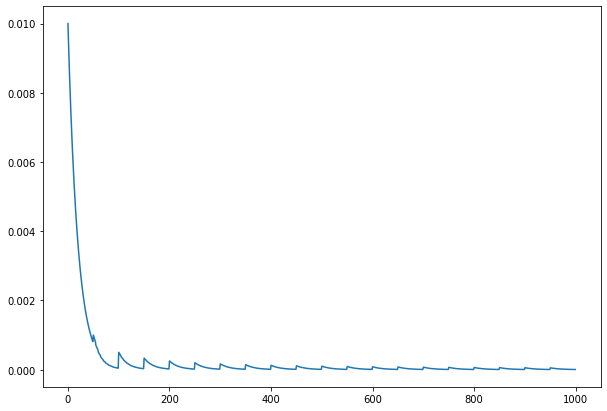

In [12]:
plt.figure(figsize=(10,7))
y6 = []
for i in range(1000):
    if i//50!=0:
        y6.append((0.01/(10*i//50))*0.95**(i%50))    # 每整50次，则学习率缩小10倍
    else:
        y6.append(0.01*0.95**i)
plt.plot(y6)
plt.show()

##### 总结
在使用传统的学习率衰减方法后，学习率在迭代100次之内，就非常接近于0且相对图上来看，衰减率变慢，所以对其进行了修正，即每迭代一定的次数后，适当降低学习率，并让其沿着一开始的下降速率继续衰减，而且学习率也不会衰减到非常小e-14。